In [16]:
# COVID-19 Global Data Tracker

# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter('ignore', category=FutureWarning)

# Set style for seaborn
sns.set(style="whitegrid")

# Step 2: Load Dataset
df = pd.read_csv("owid-covid-data.csv")

# Step 3: Explore Dataset
print("\nColumns:", df.columns.tolist())
print("\nPreview:")
print("\nMissing Values:")
print(df.isnull().sum())
df.head()


Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [21]:
# Step 4: Clean Data
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
# Filter countries of interest
countries = ['Kenya', 'United States', 'India']
df = df[df['location'].isin(countries)]

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Fill missing values in key columns
df['total_cases'] = df['total_cases'].fillna(0)
df['total_deaths'] = df['total_deaths'].fillna(0)
df['new_cases'] = df['new_cases'].fillna(0)
df['new_deaths'] = df['new_deaths'].fillna(0)
df['total_vaccinations'] = df['total_vaccinations'].fillna(0)
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,death_rate
139773,IND,Asia,India,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN,NaN
139774,IND,Asia,India,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN,NaN
139775,IND,Asia,India,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN,NaN
139776,IND,Asia,India,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN,NaN
139777,IND,Asia,India,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN,NaN


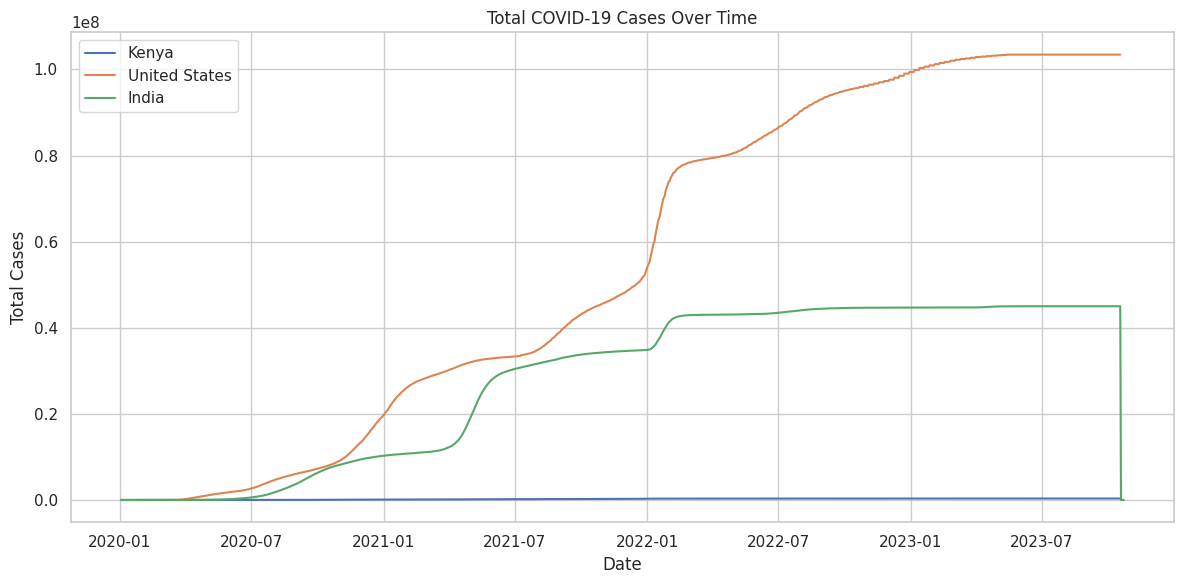

In [18]:
# Step 5: Exploratory Data Analysis (EDA)
# Plot total cases over time
plt.figure(figsize=(12,6))
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.tight_layout()
plt.show()

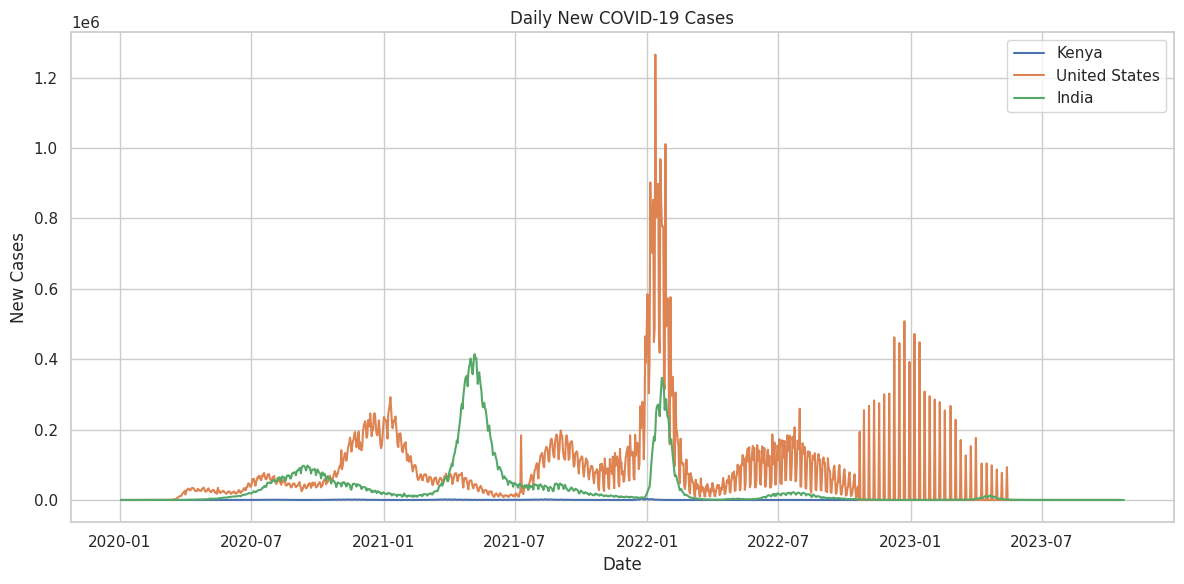

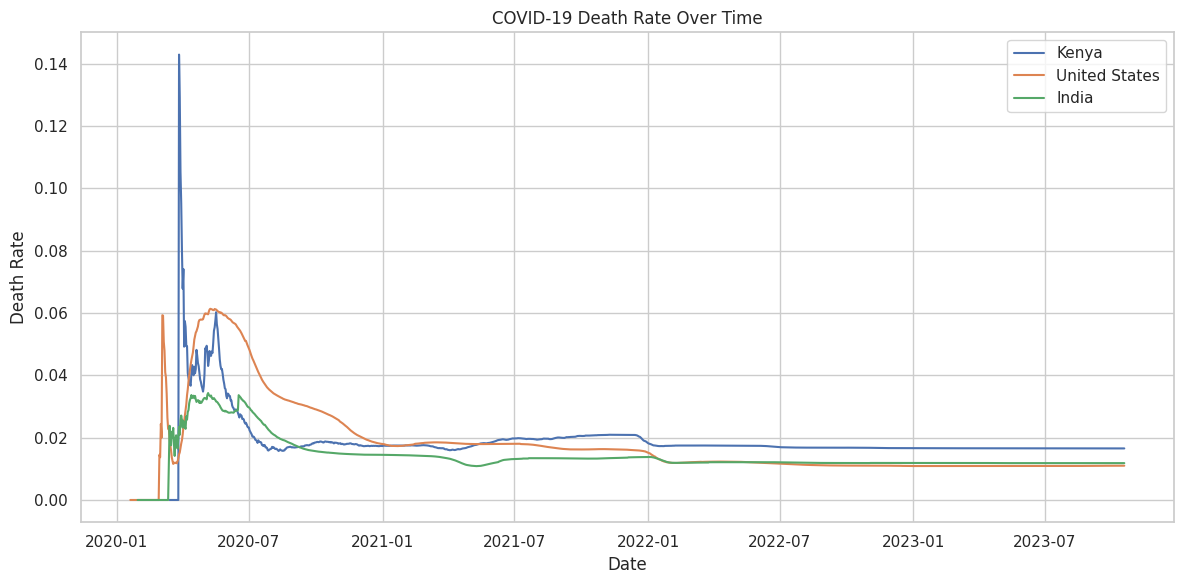

In [19]:
# Compare daily new cases
plt.figure(figsize=(12,6))
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['new_cases'], label=country)
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()

# Calculate and plot death rate
df['death_rate'] = df['total_deaths'] / df['total_cases']
plt.figure(figsize=(12,6))
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['death_rate'], label=country)
plt.title('COVID-19 Death Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Death Rate')
plt.legend()
plt.tight_layout()
plt.show()

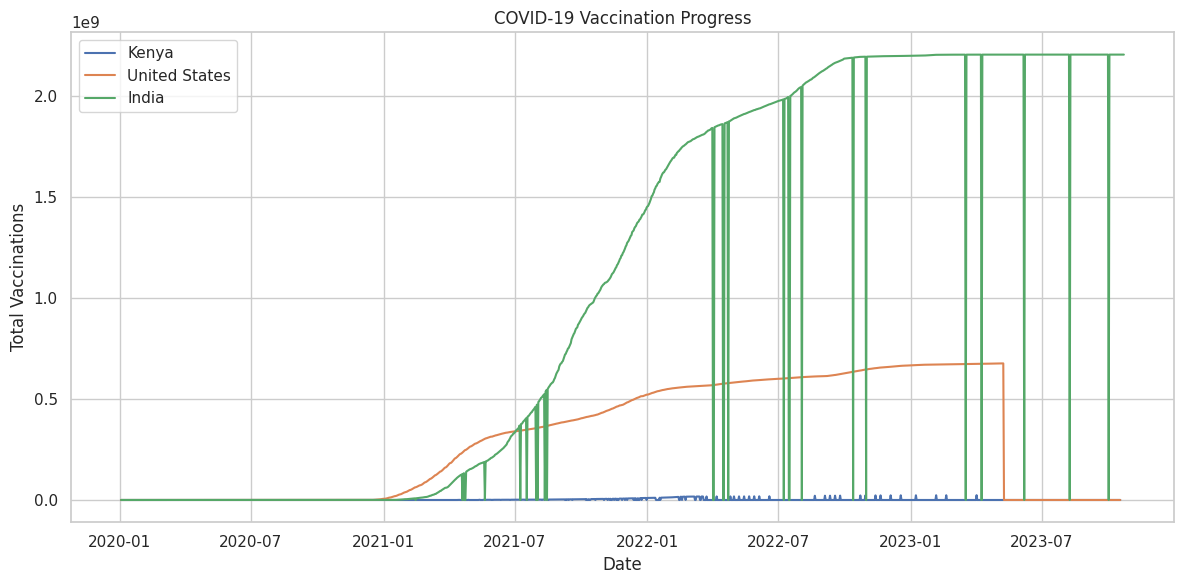

In [20]:
# 💉 Step 6: Vaccination Progress
plt.figure(figsize=(12,6))
for country in countries:
    country_df = df[df['location'] == country]
    plt.plot(country_df['date'], country_df['total_vaccinations'], label=country)
plt.title('COVID-19 Vaccination Progress')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.tight_layout()
plt.show()

#Choropleth Map with Plotly (Latest Date)
latest_date = df['date'].max()
latest_df = df[df['date'] == latest_date][['iso_code', 'location', 'total_cases']].dropna()
fig = px.choropleth(latest_df,
                    locations="iso_code",
                    color="total_cases",
                    hover_name="location",
                    color_continuous_scale="Reds",
                    title=f"COVID-19 Total Cases by Country as of {latest_date.date()}"
                   )
fig.show()

Total Cases Over Time: The United States and India have significantly higher total COVID-19 cases compared to Kenya.

Vaccination Trends: India shows a rapid increase in total vaccinations, surpassing the United States and Kenya